In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
data = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data.shape)
data.head(4)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [3]:
data['Attrition'] = data['Attrition'].replace('Yes',1)
data['Attrition'] = data['Attrition'].replace('No',0)


In [4]:
X = data.drop(['Attrition'],axis = 1)
y = data['Attrition']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## 1. Data Analysis

### Converting the data into numerical and categorical datatypes for analysis

In [6]:
numeric_ = data.select_dtypes(exclude=['object']).copy()
categor_ = data.select_dtypes(['object']).copy()

### Univariate Analysis

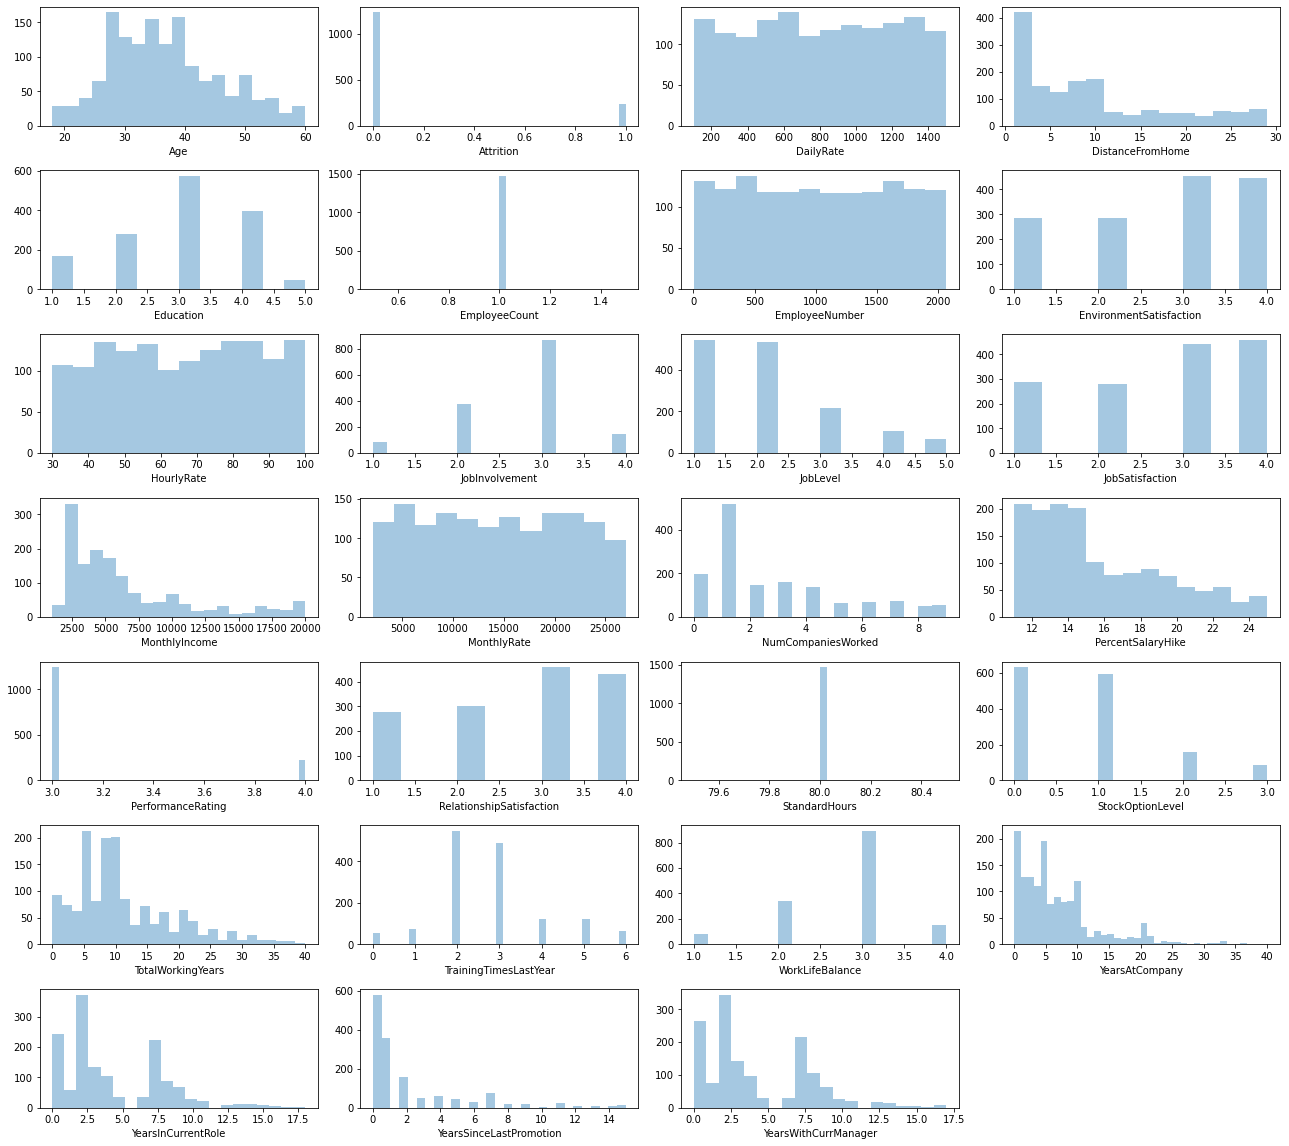

In [7]:
fig = plt.figure(figsize = (18,16))
for index,col in enumerate(numeric_):
    plt.subplot(7,4,index+1)
    sns.distplot(numeric_.loc[:,col],kde = False)
fig.tight_layout(pad=1.0)

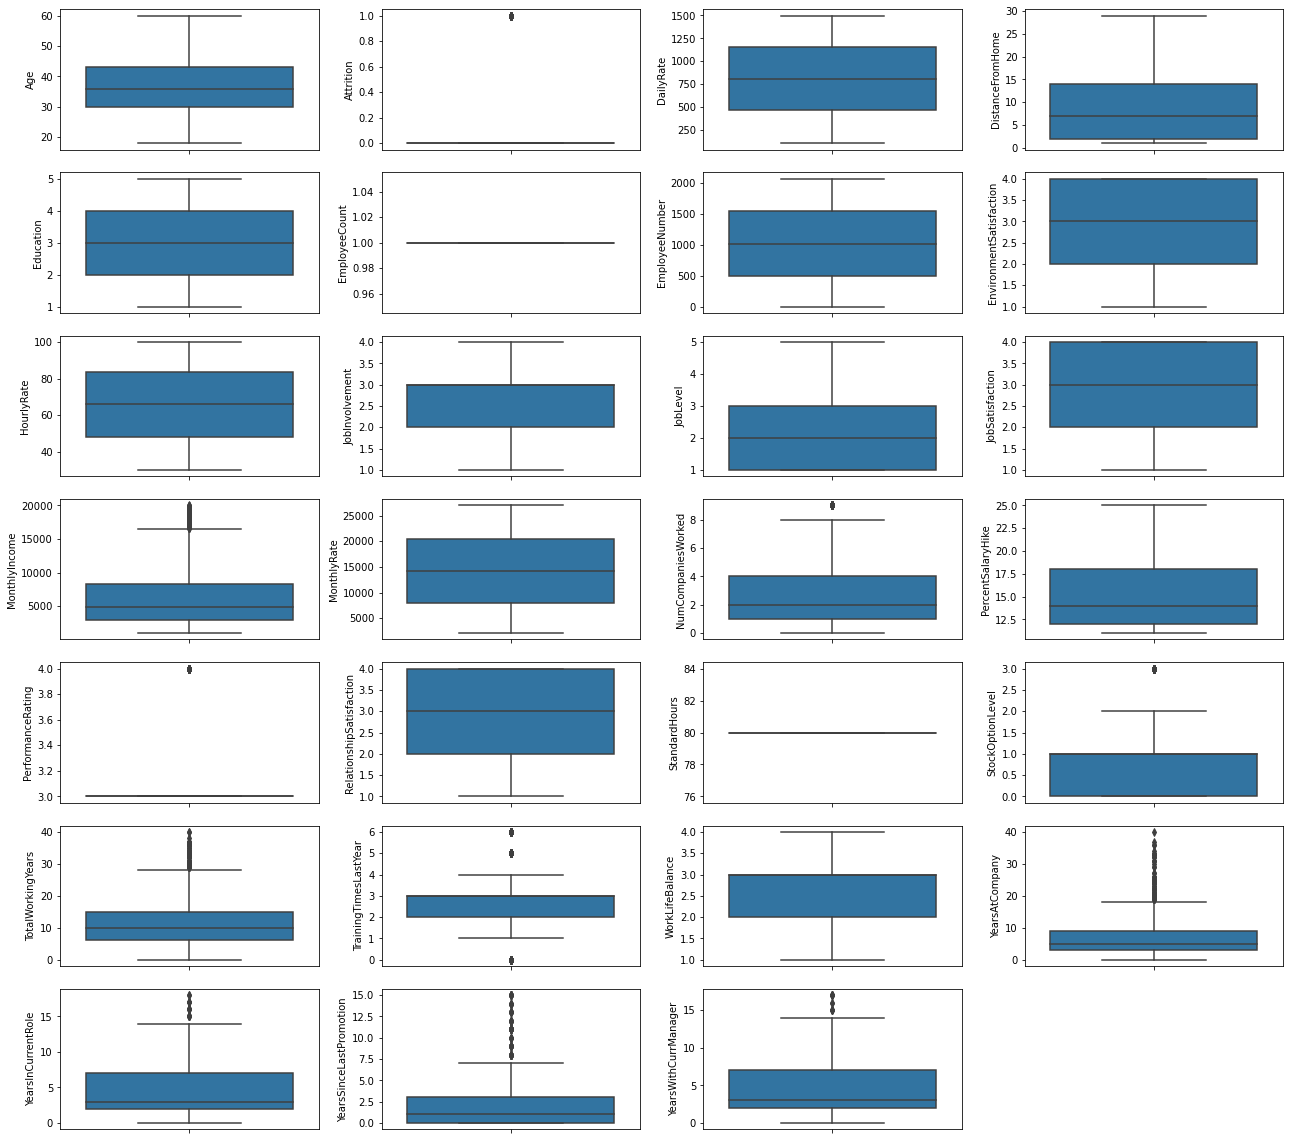

In [8]:
fig = plt.figure(figsize = (18,16))
for index,col in enumerate(numeric_):
    plt.subplot(7,4,index+1)
    sns.boxplot(y = numeric_.loc[:,col])
fig.tight_layout(pad=1.0)

## We see there are few columns with outliers, they will be dealt with in the upcoming section

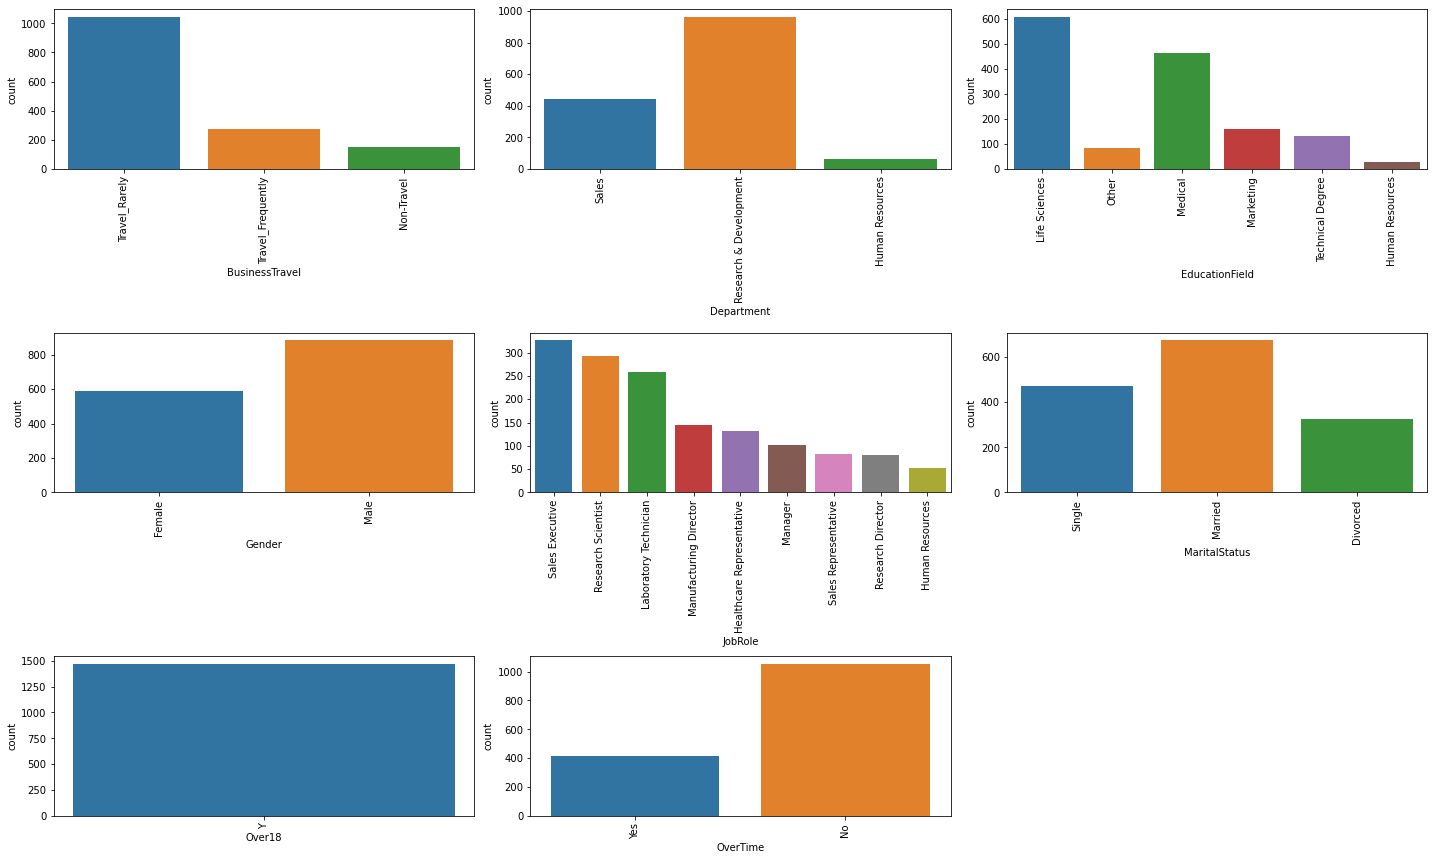

In [9]:
fig = plt.figure(figsize = (20,16))
for index in range(len(categor_.columns)):
    plt.subplot(4,3,index+1)
    sns.countplot(x = categor_.iloc[:,index])
    plt.xticks(rotation = 90)
fig.tight_layout(pad = 1.0)

1. ### Clearly the column = Over18 has single value, hence we will be removing the same from the dataset

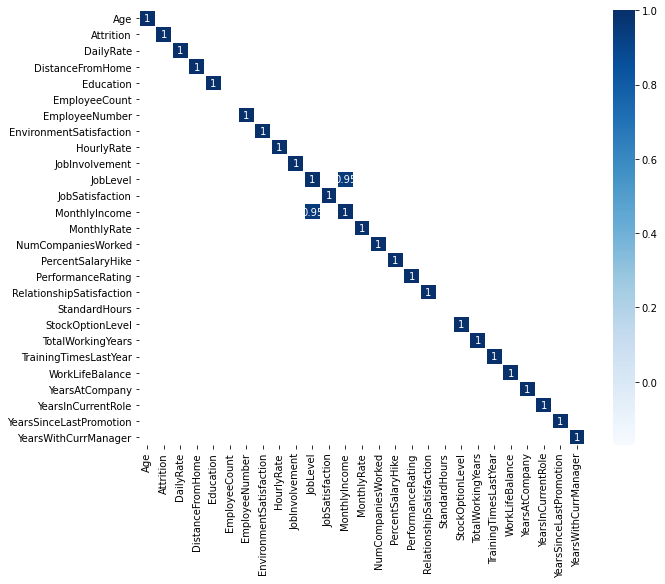

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(numeric_.corr(),mask = numeric_.corr() <0.8,annot = True,cmap = 'Blues',linewidths=0.7)

1. Clearly the column = StandardHours has single value, hence we will be removing the same from the dataset
2. Job level and Monthly Income - Have high collinerity, hence we need to remove them from our dataset

In [11]:
correlation = data.corr()
correlation[['Attrition']].sort_values(['Attrition'],ascending = False)

,Attrition
Attrition,1.000000
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
MonthlyRate,0.015170
PerformanceRating,0.002889
HourlyRate,-0.006846
EmployeeNumber,-0.010577
PercentSalaryHike,-0.013478
Education,-0.031373
YearsSinceLastPromotion,-0.033019


- We can clearly see that the EmployeeCount and StandardHours have only value, hence we will remove them.
- Need to remove correlations with very less value

In [12]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat1 = []
for i in cat_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_cat1.append(i)
overfit_cat1 = list(overfit_cat1)
X.drop(overfit_cat1, axis=1,inplace = True)

In [13]:
num_col = X.select_dtypes(exclude = ['object']).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros/len(X)*100 > 96:
        overfit_num.append(i)
overfit_num = list(overfit_num)
X.drop(overfit_num,axis=1,inplace = True)

In [14]:
print("Categorical Features with >96% of the same value: ",overfit_cat1)
print("Numerical Features with >96% of the same value: ",overfit_num)

Categorical Features with >96% of the same value:  ['Over18']
Numerical Features with >96% of the same value:  ['EmployeeCount', 'StandardHours']


In [15]:
## removing columns with high collinearity
X.drop(['JobLevel'],inplace = True,axis = 1)
X.drop(['MonthlyIncome'],inplace = True,axis = 1)

## Dealing with Outliers:


In [16]:
data = data.drop(data[data['MonthlyIncome'] > 20000].index)
data = data.drop(data[data['YearsSinceLastPromotion'] > 11.0].index)
data = data.drop(data[data['YearsAtCompany'] > 25].index)
data = data.drop(data[data['YearsInCurrentRole'] > 16].index)
data = data.drop(data[data['YearsWithCurrManager'] > 15].index)
data = data.drop(data[data['TrainingTimesLastYear'] > 5].index)

In [17]:
data.shape

(1340, 35)

In [18]:
X = pd.get_dummies(X)

In [19]:
X = X.loc[data.index]
y = y.loc[data.index]


In [20]:
from sklearn.preprocessing import RobustScaler

cols = X.select_dtypes(np.number).columns
transformer = RobustScaler().fit(X[cols])
X[cols] = transformer.transform(X[cols])

In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1340, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state = 1000,test_size = 0.2)


In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 600,learning_rate =0.05)
xgb.fit(X_train,y_train,
       early_stopping_rounds = 5,
       eval_set = [(X_val,y_val)],
       verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
from sklearn.metrics import accuracy_score,log_loss
y_pred = xgb.predict(X_val)
score = accuracy_score(y_pred,y_val)
score

0.8731343283582089

In [25]:
loss = log_loss(y_pred,y_val)
loss

4.381865621483502